In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
'''Matplotlib’s plot() function in inline mode is a feature that allows you
to display the generated plots directly within the Jupyter Notebook
environment rather than in separate windows. To enable inline plotting in a
code, we typically use the %matplotlib inline magic command. This command is
placed at the beginning of the notebook and informs Matplotlib to render the
plots directly below the code cells.'''

'Matplotlib’s plot() function in inline mode is a feature that allows you\nto display the generated plots directly within the Jupyter Notebook\nenvironment rather than in separate windows. To enable inline plotting in a\ncode, we typically use the %matplotlib inline magic command. This command is\nplaced at the beginning of the notebook and informs Matplotlib to render the\nplots directly below the code cells.'

In [17]:
df = pd.read_csv('C:/Users/user1/Downloads/breastcancer1.csv')

In [18]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [7]:
df['radius_mean'] = df['radius_mean'].fillna(df['radius_mean'].mean())
df['texture_mean'] = df['texture_mean'].fillna(df['texture_mean'].mean())
df['perimeter_mean'] = df['perimeter_mean'].fillna(df['perimeter_mean'].mean())
df['area_mean'] = df['area_mean'].fillna(df['area_mean'].mean())
df['smoothness_mean'] = df['smoothness_mean'].fillna(df['smoothness_mean'].mean())
df['compactness_mean'] = df['compactness_mean'].fillna(df['compactness_mean'].mean())
df['concavity_mean'] = df['concavity_mean'].fillna(df['concavity_mean'].mean())
df['concave points_mean'] = df['concave points_mean'].fillna(df['concave points_mean'].mean())
df['symmetry_mean'] = df['symmetry_mean'].fillna(df['symmetry_mean'].mean())
df['fractal_dimension_mean'] = df['fractal_dimension_mean'].fillna(df['fractal_dimension_mean'].mean())
df['radius_se'] = df['radius_se'].fillna(df['radius_se'].mean())
df['texture_se'] = df['texture_se'].fillna(df['texture_se'].mean())

In [31]:
df.dropna(inplace=True)
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [32]:
y=df['diagnosis']
X=df[['texture_mean','radius_mean']]

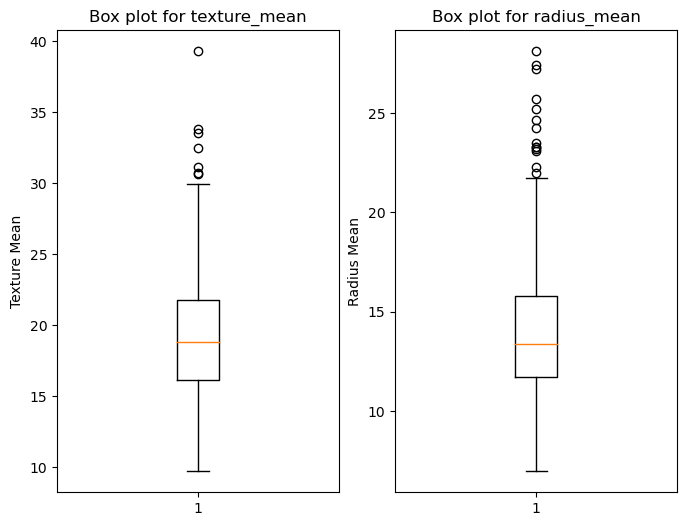

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df['texture_mean'])
plt.title('Box plot for texture_mean')
plt.ylabel('Texture Mean')
plt.subplot(1, 2, 2)
plt.boxplot(df['radius_mean'])
plt.title('Box plot for radius_mean')
plt.ylabel('Radius Mean')
plt.show()

In [34]:
Q1_texture = df['texture_mean'].quantile(0.25)
Q3_texture = df['texture_mean'].quantile(0.75)
IQR_texture = Q3_texture - Q1_texture
Q1_radius = df['radius_mean'].quantile(0.25)
Q3_radius = df['radius_mean'].quantile(0.75)
IQR_radius = Q3_radius - Q1_radius
lower_bound_texture = Q1_texture - 1.5 * IQR_texture
upper_bound_texture = Q3_texture + 1.5 * IQR_texture
lower_bound_radius = Q1_radius - 1.5 * IQR_radius
upper_bound_radius = Q3_radius + 1.5 * IQR_radius
df_cleaned = df[(df['texture_mean'] >= lower_bound_texture) & (df['texture_mean'] <= upper_bound_texture) &
(df['radius_mean'] >= lower_bound_radius) & (df['radius_mean'] <= upper_bound_radius)]
print("Original dataset shape:", df.shape)
print("Cleaned dataset shape:", df_cleaned.shape)

Original dataset shape: (569, 32)
Cleaned dataset shape: (548, 32)


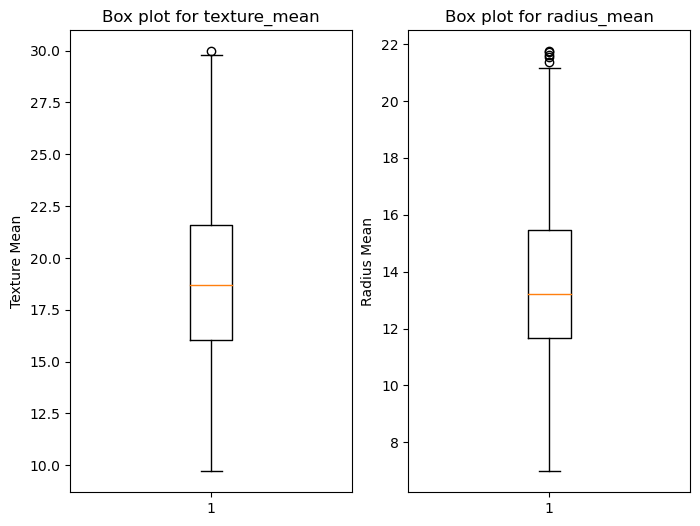

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.boxplot(df_cleaned['texture_mean'])
plt.title('Box plot for texture_mean')
plt.ylabel('Texture Mean')
plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned['radius_mean'])
plt.title('Box plot for radius_mean')
plt.ylabel('Radius Mean')
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
k_values = list(range(1, 30))
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
'''The zip() function in Python combines multiple iterables such as lists,
tuples, strings, dict etc, into a single iterator of tuples.
Each tuple contains elements from the input iterables that are at the
same position.'''
for k, accuracy in zip(k_values, accuracies):
    print(f'k={k}, Accuracy: {accuracy:.4f}')
best_k = k_values[accuracies.index(max(accuracies))]
print(f'Best k: {best_k} with accuracy: {max(accuracies):.4f}')

k=1, Accuracy: 0.8947
k=2, Accuracy: 0.8947
k=3, Accuracy: 0.8947
k=4, Accuracy: 0.8860
k=5, Accuracy: 0.9035
k=6, Accuracy: 0.9035
k=7, Accuracy: 0.9035
k=8, Accuracy: 0.9211
k=9, Accuracy: 0.9211
k=10, Accuracy: 0.9298
k=11, Accuracy: 0.9035
k=12, Accuracy: 0.9298
k=13, Accuracy: 0.9211
k=14, Accuracy: 0.9298
k=15, Accuracy: 0.9211
k=16, Accuracy: 0.9211
k=17, Accuracy: 0.9211
k=18, Accuracy: 0.9211
k=19, Accuracy: 0.9123
k=20, Accuracy: 0.9211
k=21, Accuracy: 0.9035
k=22, Accuracy: 0.9123
k=23, Accuracy: 0.9035
k=24, Accuracy: 0.9123
k=25, Accuracy: 0.9035
k=26, Accuracy: 0.9035
k=27, Accuracy: 0.9123
k=28, Accuracy: 0.9123
k=29, Accuracy: 0.9123
Best k: 10 with accuracy: 0.9298


In [39]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
best_k = 6
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:")
print(conf_matrix)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy Score:", accuracy)
precision = precision_score(y_test, predictions)
print("Precision Score:", precision)
recall = recall_score(y_test, predictions)
print("Recall Score:", recall)
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

Confusion Matrix:
[[66  5]
 [ 6 37]]
Accuracy Score: 0.9035087719298246
Precision Score: 0.8809523809523809
Recall Score: 0.8604651162790697
F1 Score: 0.8705882352941177


<Axes: >

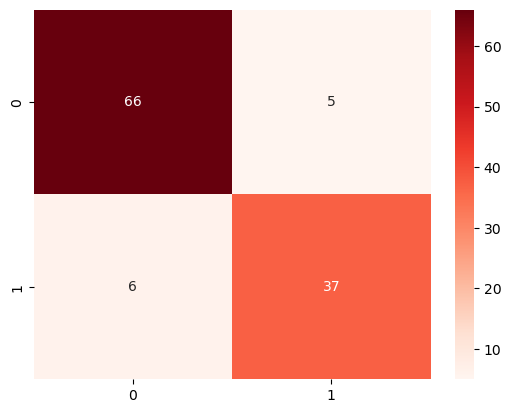

In [40]:
sns.heatmap(conf_matrix, annot=True,fmt='g',cmap="Reds")

<Axes: >

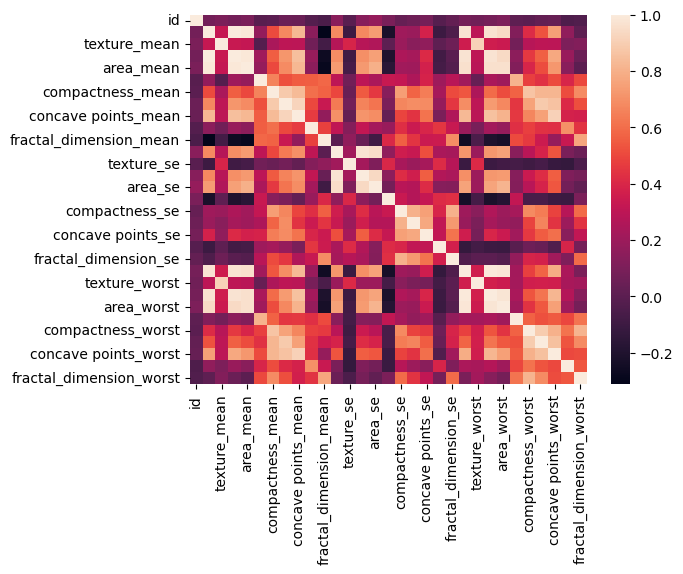

In [41]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr())